In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# summarixe confidence interval on ARIMA forecast
df = pd.read_csv('data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

X = df.values
X = X.astype('float32')
size = len(X)-1
train, test = X[0:size], X[size:]

model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)

forecast, stderr, conf = model_fit.forecast()

print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% confidence interval: %.3f to %.3f' %(conf[0][0], conf[0][1]))

Expected: 50.000
Forecast: 45.878
Standard Error: 6.996
95% confidence interval: 32.167 to 59.590


In [3]:
# summarize multiple confidence intervals on ARIMA forecast

df = pd.read_csv('data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

X = df.values
X = X.astype('float32')
size = len(X)-1
train, test = X[0:size], X[size:]

model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)

intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print('%.1f%% confidence interval: %.3f between %.3f and %.3f' %((1-a)*100, forecast, conf[0][0], conf[0][1]))

80.0% confidence interval: 45.878 between 36.913 and 54.844
90.0% confidence interval: 45.878 between 34.371 and 57.386
95.0% confidence interval: 45.878 between 32.167 and 59.590
99.0% confidence interval: 45.878 between 27.858 and 63.898


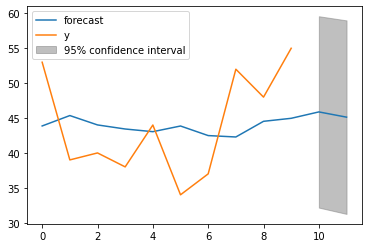

In [4]:
# plotting confidence interval

model_fit.plot_predict(len(train)-10, len(train)+1)
plt.legend(loc='upper left')
plt.show()